In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sklearn.kernel_approximation

In [2]:
def exact_kernel_distance(P, Q):
    PP = np.exp(- np.sum((P[:, None, :] - P[None, :, :])**2, axis=-1)).sum()
    QQ = np.exp(- np.sum((Q[:, None, :] - Q[None, :, :])**2, axis=-1)).sum()
    PQ = np.exp(- np.sum((P[:, None, :] - Q[None, :, :])**2, axis=-1)).sum()
    return np.sqrt(PP + QQ - 2 * PQ)


def approx_kernel_distance(P, Q, mapping):
    Phi_P = mapping(P).sum(axis=0)
    Phi_Q = mapping(Q).sum(axis=0)
    return np.sqrt(np.sum((Phi_P - Phi_Q)**2))

In [3]:
### easy case

#fixed line + same scatter
line = lambda x, m=1, b=0: b + m * x

scatter = 0.05
P_size = 2001
Q_size = 3000
x_P = np.random.uniform(-1, 1, P_size)
x_Q = np.random.uniform(-1, 1, Q_size)

P = np.asarray([x_P, line(x_P) + np.random.normal(0, scatter, P_size)]).T
Q = np.asarray([x_Q, line(x_Q) + np.random.normal(0, scatter, Q_size)]).T

#train kernel approximator on P
Phi_approx = sklearn.kernel_approximation.Nystroem(n_components=50, gamma=1)
Phi_approx.fit(P)

exact_kernel_distance(P, Q), approx_kernel_distance(P, Q, Phi_approx.transform)

(717.6456688636509, 717.6456683045105)

<IPython.core.display.Javascript object>


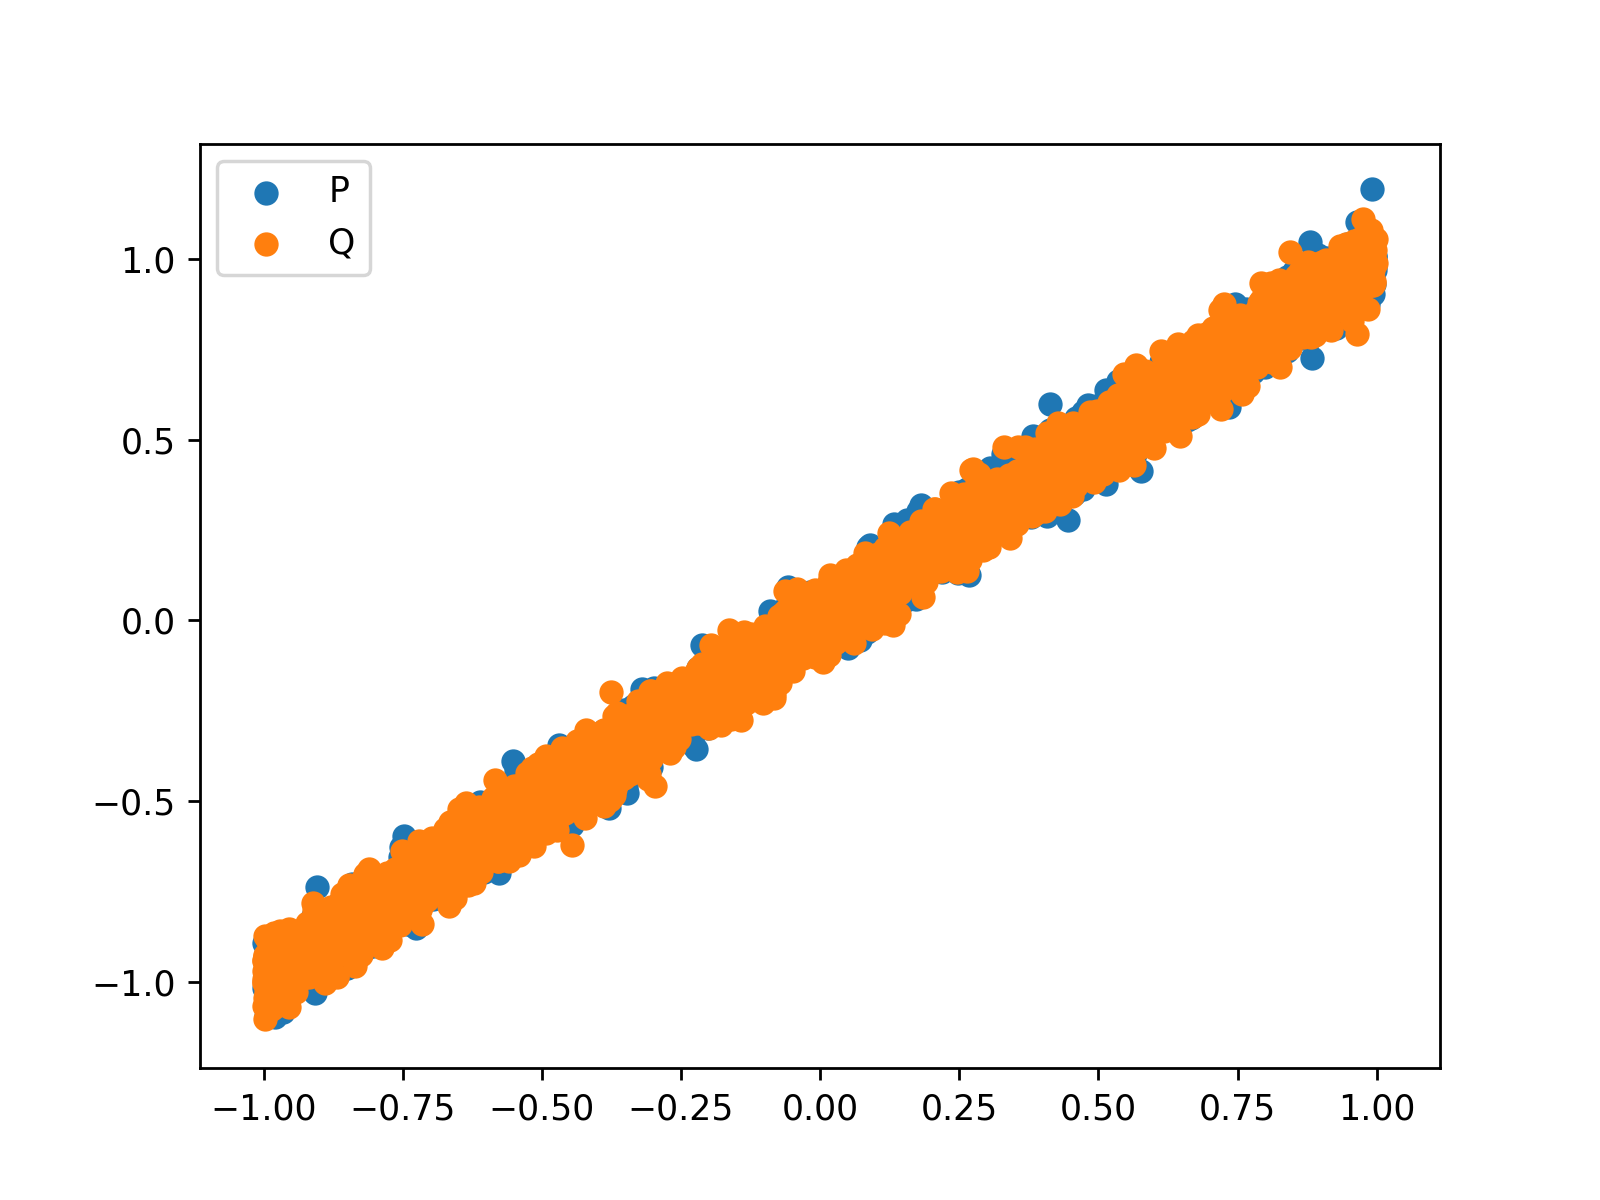

In [4]:
plt.figure()
plt.scatter(P[:, 0], P[:, 1], label='P')
plt.scatter(Q[:, 0], Q[:, 1], label='Q')
plt.legend();

In [136]:
%timeit(exact_kernel_distance(P, Q))

497 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit approx_kernel_distance(P, Q, Phi_approx.transform)

2.23 ms ± 96 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
### more difficult case

#different lines + same scatter
line = lambda x, m=1, b=0: b + m * x

scatter = 0.05
P_size = 2001
Q_size = 3000
x_P = np.random.uniform(-1, 1, P_size)
x_Q = np.random.uniform(-1, 1, Q_size)

P = np.asarray([x_P, line(x_P) + np.random.normal(0, scatter, P_size)]).T
Q = np.asarray([x_Q, line(x_Q, m=0.5, b=0.8) + np.random.normal(0, scatter, Q_size)]).T

#train kernel approximator on P
Phi_approx = sklearn.kernel_approximation.Nystroem(n_components=50, gamma=1)
Phi_approx.fit(P)

#training just on P doesn't work so well, since Q is distributed differently
exact_kernel_distance(P, Q), approx_kernel_distance(P, Q, Phi_approx.transform)

(1787.1883142527824, 1779.1332198288083)

In [8]:
#training on a point set that spans the range covered by both P and Q improves things, even if the training set has 
#a different shape than P or Q
R_train = np.random.uniform([-1, Q.min()], [1, Q.max()], size=[500, 2])
Phi_approx.fit(R_train);

exact_kernel_distance(P, Q), approx_kernel_distance(P, Q, Phi_approx.transform)

(1787.1883142527824, 1787.182793645348)

<IPython.core.display.Javascript object>


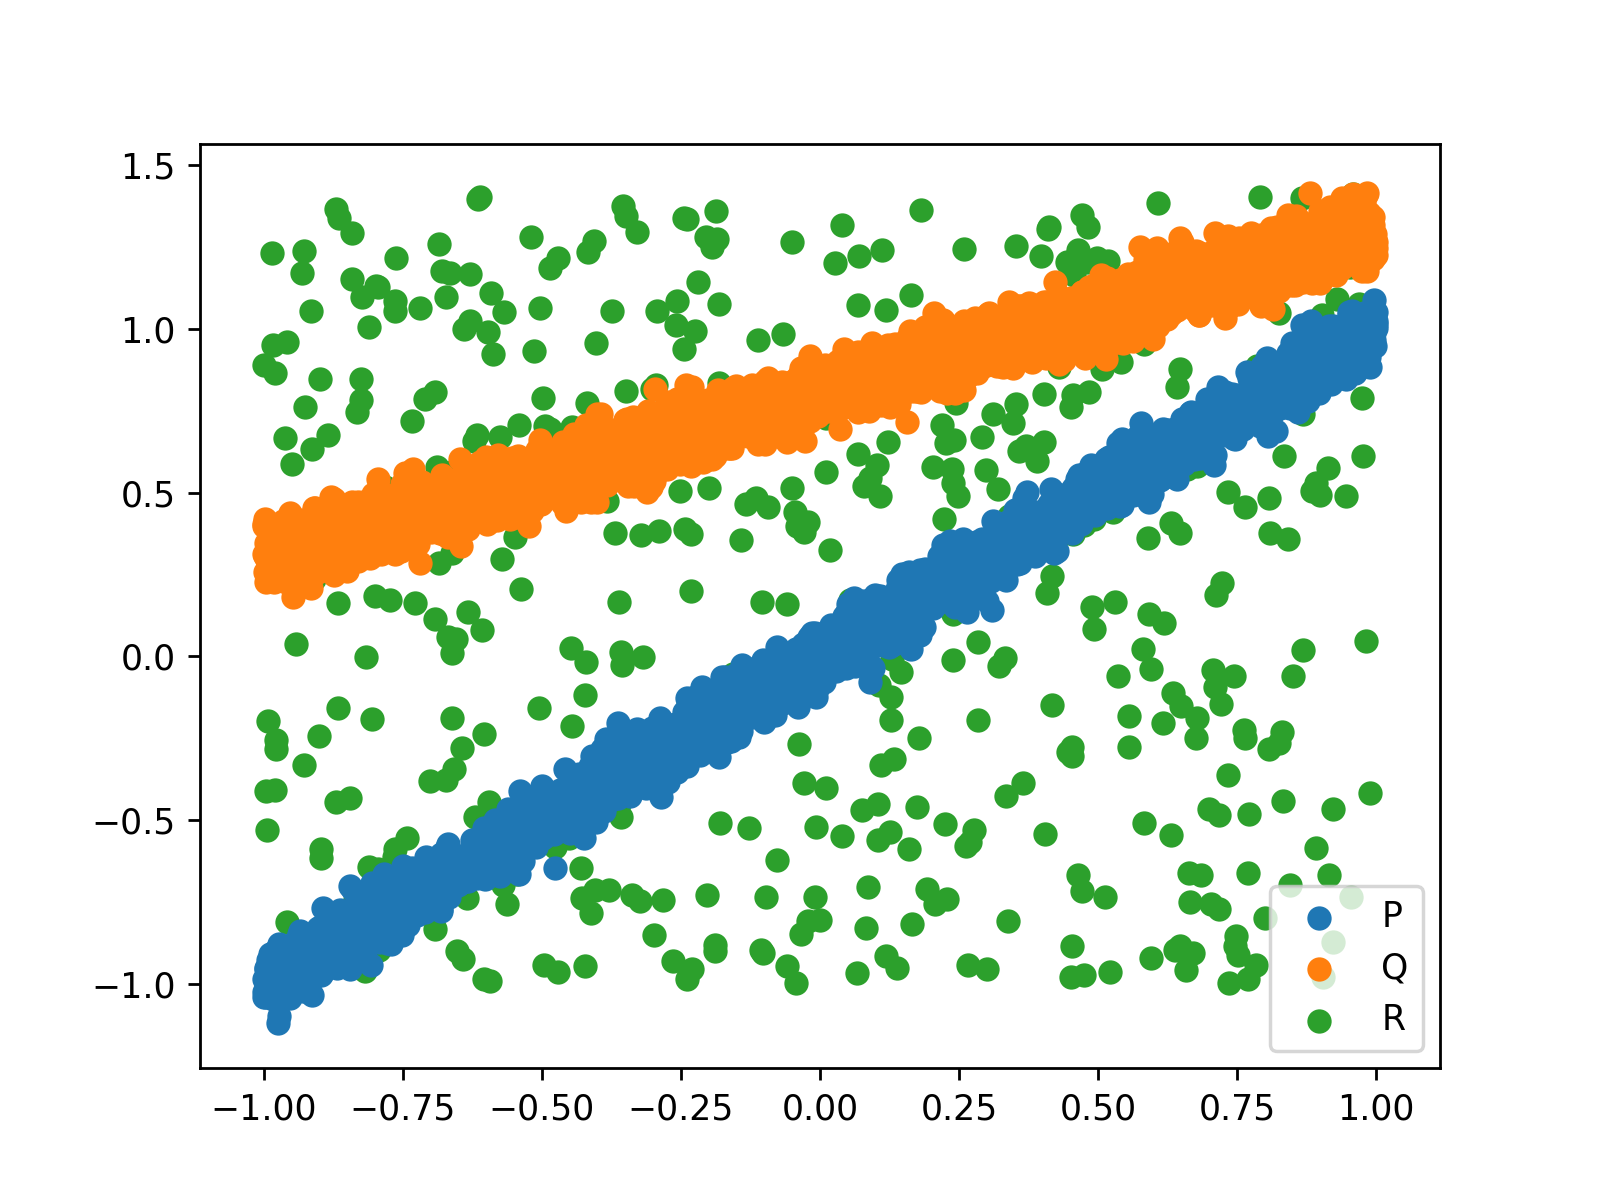

In [9]:
plt.figure()
plt.scatter(P[:, 0], P[:, 1], label='P', zorder=2)
plt.scatter(Q[:, 0], Q[:, 1], label='Q', zorder=2)
plt.scatter(R_train[:, 0], R_train[:, 1], label='R', zorder=1)
plt.legend();